In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('fifa19\data.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Flag,https://cdn.sofifa.org/flags/52.png,https://cdn.sofifa.org/flags/38.png,https://cdn.sofifa.org/flags/54.png,https://cdn.sofifa.org/flags/45.png,https://cdn.sofifa.org/flags/7.png
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


# Data Cleaning

In [8]:
df.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

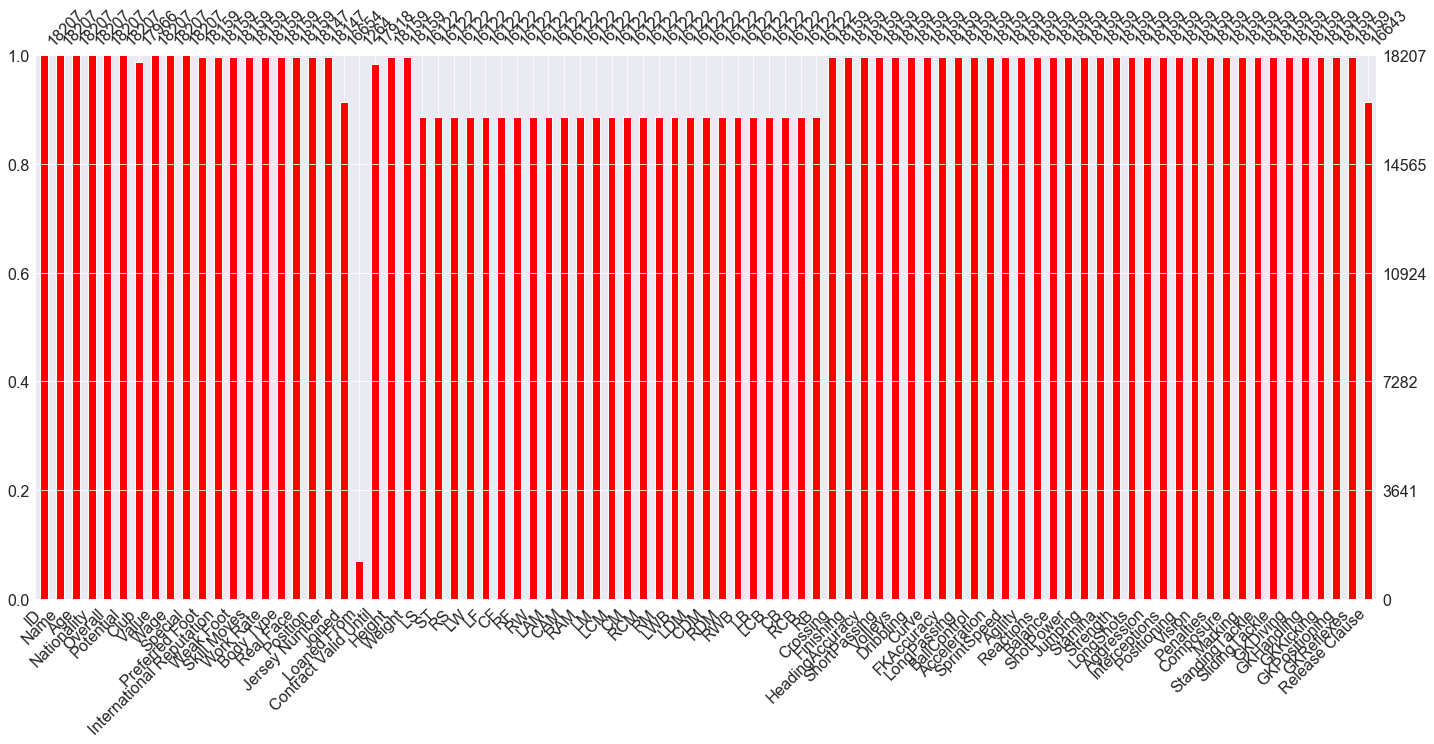

In [9]:
msno.bar(df.sample( 18207 ),color='red', labels=True)

In [10]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF            

In [11]:
missing_height = df[df['Height'].isnull()].index.tolist()

In [12]:
missing_height

[13236,
 13237,
 13238,
 13239,
 13240,
 13241,
 13242,
 13243,
 13244,
 13245,
 13246,
 13247,
 13248,
 13249,
 13250,
 13251,
 13252,
 13253,
 13254,
 13255,
 13256,
 13257,
 13258,
 13259,
 13260,
 13261,
 13262,
 13263,
 13264,
 13265,
 13266,
 13267,
 13268,
 13269,
 13270,
 13271,
 13272,
 13273,
 13274,
 13275,
 13276,
 13277,
 13278,
 13279,
 13280,
 13281,
 13282,
 13283]

In [13]:
df.drop(df.index[missing_height],inplace =True)

In [14]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                       0
Position                       12
Jersey Number                  12
Joined                       1505
Loaned From                 16895
Contract Valid Until          241
Height                          0
Weight                          0
LS                           2037
ST                           2037
RS                           2037
LW                           2037
LF                           2037
CF            

In [15]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

# Data Analysis

### Number of unique countries

In [16]:
print('Total number of countries : {}'.format(df['Nationality'].nunique()))

Total number of countries : 164


In [17]:
df['Nationality'].value_counts().sort_values(ascending = False)

England                 1657
Germany                 1195
Spain                   1071
Argentina                936
France                   911
Brazil                   825
Italy                    699
Colombia                 616
Japan                    478
Netherlands              452
Sweden                   396
China PR                 390
Chile                    388
Republic of Ireland      368
Mexico                   365
United States            353
Poland                   348
Norway                   341
Saudi Arabia             337
Denmark                  335
Korea Republic           333
Portugal                 322
Turkey                   303
Austria                  296
Scotland                 283
Belgium                  259
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
Wales                    129
Croatia                  126
Serbia                   126
Nigeria                  121
Ghana         

###### Looks like European countries have the most number of players

### Number of unique clubs

In [18]:
print('Total number of clubs : {}'.format(df['Club'].nunique()))

Total number of clubs : 651


### Number of players on each Team - sorted in Descending order

In [19]:
df['Club'].value_counts().sort_values(ascending = False)

RC Celta                               33
Frosinone                              33
Atlético Madrid                        33
Manchester City                        33
Cardiff City                           33
Liverpool                              33
Wolverhampton Wanderers                33
Chelsea                                33
Valencia CF                            33
Eintracht Frankfurt                    33
AS Monaco                              33
Newcastle United                       33
Rayo Vallecano                         33
Burnley                                33
Tottenham Hotspur                      33
CD Leganés                             33
TSG 1899 Hoffenheim                    33
Fortuna Düsseldorf                     33
Empoli                                 33
FC Barcelona                           33
Manchester United                      33
Real Madrid                            33
Borussia Dortmund                      33
Southampton                       

# Finding out best attributes of players in the game

In [20]:
print("Player with most potential: {}" .format(df.iloc[df['Potential'].idxmax()][1]))

Player with most potential: K. Mbappé


In [21]:
print("Player with most overall: {}" .format(df.iloc[df['Overall'].idxmax()][1]))

Player with most overall: L. Messi


In [22]:
football_attr = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy',
                 'LongPassing', 'BallControl','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance','ShotPower', 
                 'Jumping', 'Stamina', 'Strength', 'LongShots','Aggression', 'Interceptions', 'Positioning', 'Vision',
                 'Penalties','Composure', 'Marking', 'StandingTackle',
                 'SlidingTackle', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
for i in football_attr:
    print('Player with best {0}: {1}'.format(i, df.iloc[df[i].idxmax()][1]))

Player with best Crossing: K. De Bruyne
Player with best Finishing: L. Messi
Player with best HeadingAccuracy: Naldo
Player with best ShortPassing: L. Modrić
Player with best Volleys: E. Cavani
Player with best Dribbling: L. Messi
Player with best Curve: Quaresma
Player with best FKAccuracy: L. Messi
Player with best LongPassing: T. Kroos
Player with best BallControl: L. Messi
Player with best Acceleration: Douglas Costa
Player with best SprintSpeed: K. Mbappé
Player with best Agility: Neymar Jr
Player with best Reactions: Cristiano Ronaldo
Player with best Balance: Bernard
Player with best ShotPower: Cristiano Ronaldo
Player with best Jumping: Cristiano Ronaldo
Player with best Stamina: N. Kanté
Player with best Strength: A. Akinfenwa
Player with best LongShots: L. Messi
Player with best Aggression: B. Pearson
Player with best Interceptions: N. Kanté
Player with best Positioning: Cristiano Ronaldo
Player with best Vision: L. Messi
Player with best Penalties: M. Balotelli
Player with b

In [23]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

# Finding out most valued and highest earner in the game

In [24]:
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))

Most valued player : Neymar Jr
Highest earner : L. Messi


# Visual representations of various aspects of the game

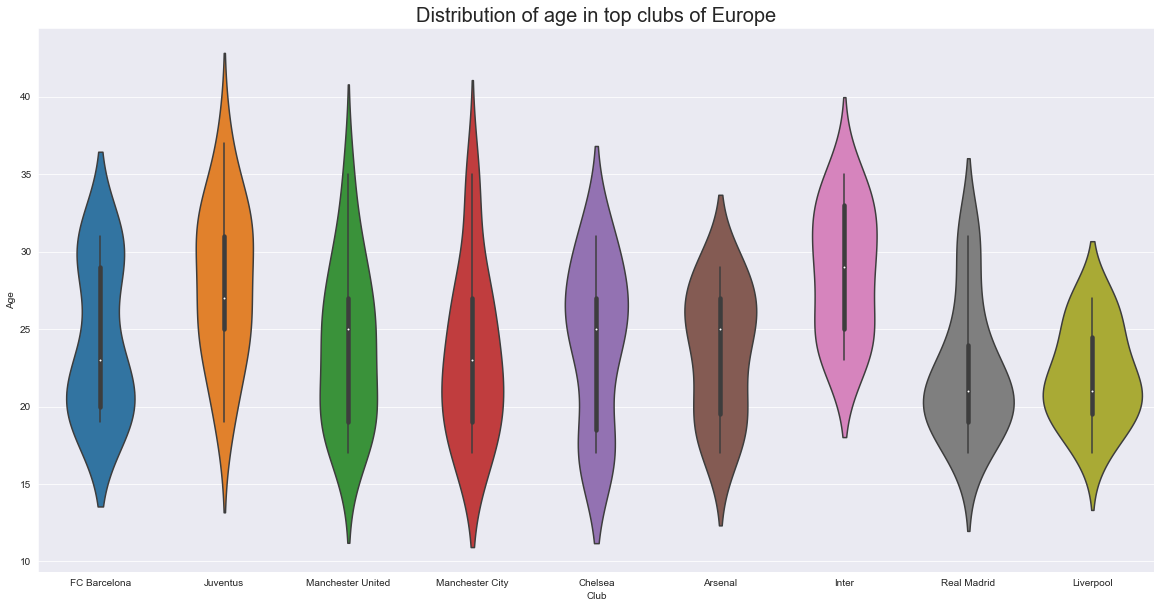

In [25]:
some_clubs = ('Juventus', 'Real Madrid', 'Inter', 'FC Barcelona', 'Chelsea', 'Manchester United', 
              'Liverpool', 'Arsenal', 'Manchester City')
df_club_1 = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x="Club", y="Age", data=df_club_1);
ax.set_title(label='Distribution of age in top clubs of Europe', fontsize=20);

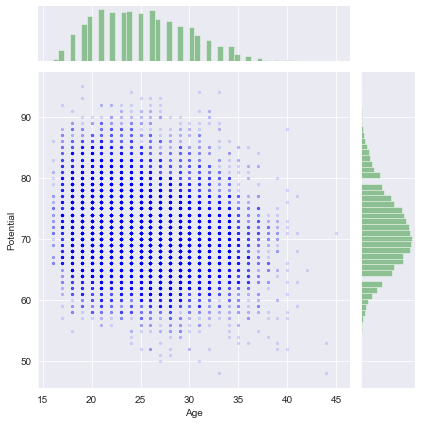

In [26]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'blue'},
              marginal_kws={'color':'green'})

###### As players grow older their potential starts decreasing

In [27]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

In [28]:
 df.groupby(df['Position'])[player_features].mean()

,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,Dribbling,FKAccuracy,Finishing,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,HeadingAccuracy,Interceptions,Jumping,LongPassing,LongShots,Marking,Penalties
Position,,,,,,,,,,,,,,,,,,,,,,
CAM,70.680585,51.560543,72.637787,73.248434,68.479123,63.111691,59.675365,68.109603,58.118998,59.442589,10.293319,10.623173,10.670146,10.491649,10.367432,49.007307,39.419624,60.187891,62.546973,60.266180,40.631524,58.136743
CB,56.792463,64.822835,52.158605,54.853206,51.445444,56.271654,38.934196,42.337458,33.668166,29.512373,10.467942,10.466254,10.501687,10.613611,10.538808,63.931384,62.827897,69.268841,49.297525,33.120922,63.313836,40.699100
CDM,61.861814,68.577004,63.859705,65.697257,64.598101,61.020042,52.126582,59.481013,48.233122,44.408228,10.619198,10.579114,10.574895,10.578059,10.565401,57.164557,64.553797,66.283755,64.148734,52.212025,63.200422,50.267932
CF,73.324324,48.878378,74.608108,73.756757,67.837838,60.959459,54.797297,68.675676,52.797297,64.608108,9.432432,9.567568,9.945946,9.972973,10.270270,54.040541,28.378378,64.391892,54.202703,61.148649,32.621622,59.351351
CM,65.669297,60.507174,67.228838,69.761836,65.112626,59.914634,54.666428,62.634864,51.428264,49.896700,10.368006,10.377331,10.431851,10.558824,10.431133,51.724534,55.538737,62.448350,64.156385,55.370875,54.800574,51.952654
GK,38.320000,26.371852,40.201481,43.098272,19.949630,45.122469,14.257284,13.856296,14.464198,12.016296,65.323951,62.868148,61.477531,63.047407,66.101728,14.368889,17.052346,57.698272,25.808395,12.653333,15.225185,20.007407
LAM,73.142857,49.571429,76.952381,75.380952,73.000000,69.857143,69.285714,73.047619,60.523810,63.714286,11.285714,11.285714,10.380952,9.476190,11.333333,54.761905,38.619048,61.666667,64.714286,62.666667,29.571429,65.190476
LB,71.901664,63.483359,68.238275,69.210287,62.165658,58.137670,63.408472,61.595310,45.563540,39.929652,10.683812,10.338880,10.456884,10.512859,10.567322,55.610439,62.674735,67.630862,55.301815,45.707262,62.251891,45.866112
LCB,57.373457,69.885802,54.578704,55.057099,56.720679,61.989198,44.083333,47.300926,36.373457,32.305556,10.598765,10.898148,10.509259,10.611111,10.436728,68.277778,67.362654,71.337963,55.564815,37.094136,67.672840,43.125000


In [29]:
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    print("position_name: {0} ; features: {1}".format(position_name, features))

position_name: CAM ; features: Acceleration       70.680585
Aggression         51.560543
Agility            72.637787
Balance            73.248434
BallControl        68.479123
Composure          63.111691
Crossing           59.675365
Dribbling          68.109603
FKAccuracy         58.118998
Finishing          59.442589
GKDiving           10.293319
GKHandling         10.623173
GKKicking          10.670146
GKPositioning      10.491649
GKReflexes         10.367432
HeadingAccuracy    49.007307
Interceptions      39.419624
Jumping            60.187891
LongPassing        62.546973
LongShots          60.266180
Marking            40.631524
Penalties          58.136743
Name: CAM, dtype: float64
position_name: CB ; features: Acceleration       56.792463
Aggression         64.822835
Agility            52.158605
Balance            54.853206
BallControl        51.445444
Composure          56.271654
Crossing           38.934196
Dribbling          42.337458
FKAccuracy         33.668166
Finishing     

In [30]:
for position_name, features in df.groupby(df['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
top_features

{'Acceleration': 68.6203531598513,
 'Jumping': 68.0585501858736,
 'Finishing': 66.42100371747212,
 'Agility': 66.13336431226766,
 'Balance': 63.88382899628253}

## Modelling

In [56]:
df_for_modelling = pd.read_csv('fifa19\data.csv')

### Dropping unecessary values

In [57]:
drop_cols = df_for_modelling.columns[28:54]
df_for_modelling = df_for_modelling.drop(drop_cols, axis = 1)
df_for_modelling = df_for_modelling.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df_for_modelling = df_for_modelling.dropna()
df_for_modelling.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [58]:
df_for_modelling.shape

(18147, 45)

In [59]:
#Turn Real Face into a binary indicator variable
def face_to_num(df_for_modelling):
    if (df_for_modelling['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
def right_footed(df_for_modelling):
    if (df_for_modelling['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0
    
def simple_position(df_for_modelling):
    if (df_for_modelling['Position'] == 'GK'):
        return 'GK'
    elif ((df_for_modelling['Position'] == 'RB') | (df_for_modelling['Position'] == 'LB') | (df_for_modelling['Position'] == 'CB') | (df_for_modelling['Position'] == 'LCB') | (df_for_modelling['Position'] == 'RCB') | (df_for_modelling['Position'] == 'RWB') | (df_for_modelling['Position'] == 'LWB') ):
        return 'df_for_modelling'
    elif ((df_for_modelling['Position'] == 'LDM') | (df_for_modelling['Position'] == 'CDM') | (df_for_modelling['Position'] == 'RDM')):
        return 'DM'
    elif ((df_for_modelling['Position'] == 'LM') | (df_for_modelling['Position'] == 'LCM') | (df_for_modelling['Position'] == 'CM') | (df_for_modelling['Position'] == 'RCM') | (df_for_modelling['Position'] == 'RM')):
        return 'MF'
    elif ((df_for_modelling['Position'] == 'LAM') | (df_for_modelling['Position'] == 'CAM') | (df_for_modelling['Position'] == 'RAM') | (df_for_modelling['Position'] == 'LW') | (df_for_modelling['Position'] == 'RW')):
        return 'AM'
    elif ((df_for_modelling['Position'] == 'RS') | (df_for_modelling['Position'] == 'ST') | (df_for_modelling['Position'] == 'LS') | (df_for_modelling['Position'] == 'CF') | (df_for_modelling['Position'] == 'LF') | (df_for_modelling['Position'] == 'RF')):
        return 'ST'
    else:
        return df_for_modelling.Position

    
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df_for_modelling.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df_for_modelling):
    if (df_for_modelling.Nationality in nat_list):
        return 1
    else:
        return 0
    
df_for_modelling1 = df_for_modelling.copy()

df_for_modelling1['Real_Face'] = df_for_modelling1.apply(face_to_num, axis=1)
df_for_modelling1['Right_Foot'] = df_for_modelling1.apply(right_footed, axis=1)
df_for_modelling1['Simple_Position'] = df_for_modelling1.apply(simple_position,axis = 1)
df_for_modelling1['Major_Nation'] = df_for_modelling1.apply(major_nation,axis = 1)

In [60]:
tempwork = df_for_modelling1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df_for_modelling1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df_for_modelling1["WorkRate2"]= tempwork[1]
#Drop original columns used
df_for_modelling1 = df_for_modelling1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df_for_modelling1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [61]:
df_for_modelling1.shape

(18147, 46)

In [62]:
#Split ID as a Target value
target = df_for_modelling1.Overall
df_for_modelling2 = df_for_modelling1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_for_modelling2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9276472780090764
RMSE : 1.8520657125741926


In [64]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

Weight,Feature
0.3634 ± 0.0065,Potential
0.1946 ± 0.0122,Age
0.0821 ± 0.0047,Reactions
0.0691 ± 0.0033,BallControl
0.0498 ± 0.0019,GKReflexes
0.0389 ± 0.0020,GKDiving
0.0255 ± 0.0020,HeadingAccuracy
0.0238 ± 0.0018,GKHandling
0.0231 ± 0.0014,ShortPassing
0.0160 ± 0.0015,Skill Moves


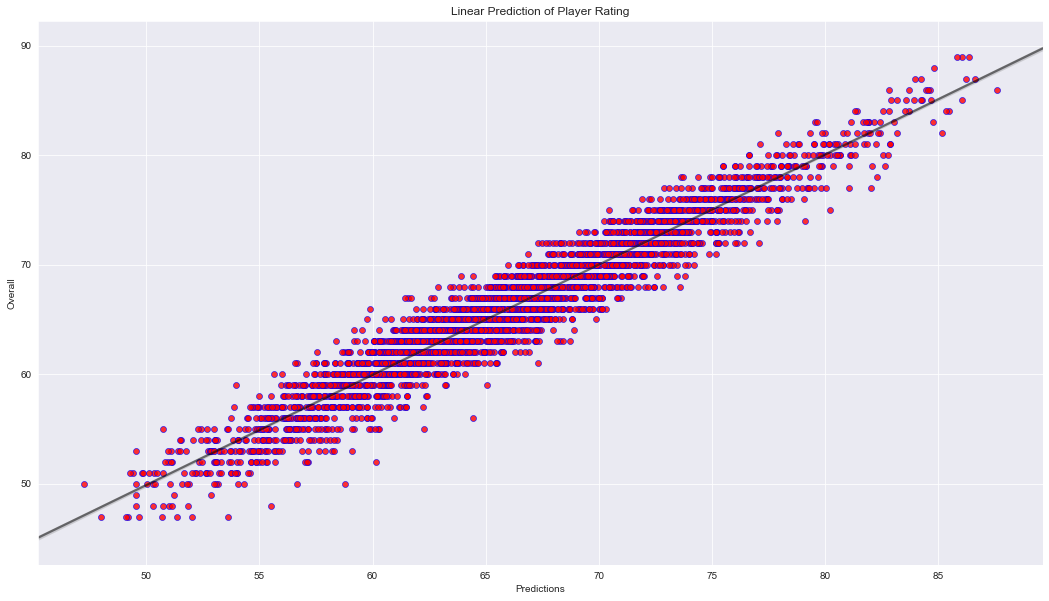

In [65]:
#Visualising the results
plt.figure(figsize=(18,10))
sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()